Hàm này sẽ thực hiện scale dữ liệu về một phân bố trong đó giá trị trung bình của các quan sát bằng 0 và độ lệch chuẩn = 1.

Nhờ việc chuẩn hóa này, các thuật toán như linear regression, logistic regression được cải thiện.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.910700,12.576885,12.285787,20.247544,18.634640
1,59.025185,0.651966,10.588892,-7.742256,22.663095
2,57.031445,21.774364,12.313031,10.610684,23.142988
3,56.950205,7.401482,11.000364,3.362518,15.685819
4,47.787701,9.181814,11.311701,22.747475,20.596151


<AxesSubplot:ylabel='Density'>

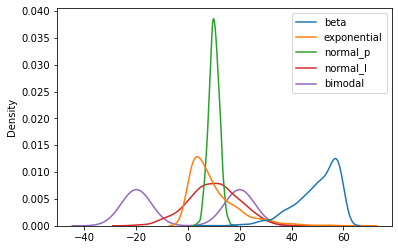

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.953986,9.928437,10.079472,9.922710,0.006513
std,8.424128,9.518540,2.059725,9.727202,20.200394
min,8.983084,0.002391,3.075260,-21.746526,-29.519613
25%,45.023412,3.046458,8.749704,3.507637,-19.915345
50%,51.972076,7.033581,10.051327,9.932111,0.009294
75%,56.693818,14.155277,11.443510,16.410873,19.869334
max,59.992810,65.649854,17.308869,39.746787,29.446301


<AxesSubplot:ylabel='Density'>

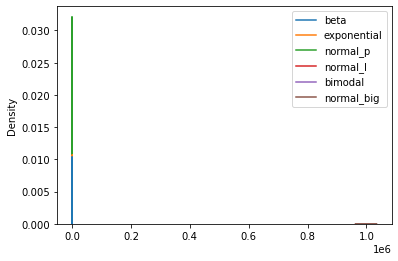

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

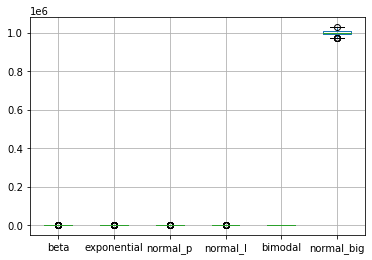

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.005141,0.278380,1.071706,1.061970,0.922628,0.328704
1,1.077350,-0.975056,0.247448,-1.816946,1.122152,-0.539765
2,0.840562,1.245134,1.084939,0.070762,1.145921,0.536679
3,0.830913,-0.265610,0.447319,-0.674755,0.776577,-1.162441
4,-0.257281,-0.078478,0.598548,1.319103,1.019779,1.968467


<AxesSubplot:ylabel='Density'>

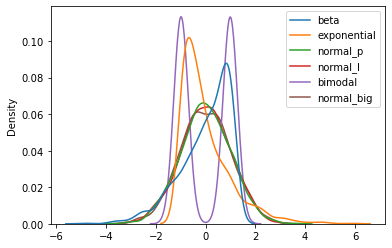

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.292122e-16,-8.071321e-17,-9.291110e-16,-7.840950e-17,-4.739542e-16,2.241762e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.865952e+00,-1.043334e+00,-3.402259e+00,-3.257369e+00,-1.462392e+00,-2.871708e+00
25%,-5.855848e-01,-7.233696e-01,-6.459281e-01,-6.598283e-01,-9.867048e-01,-6.738424e-01
50%,2.396806e-01,-3.042804e-01,-1.367123e-02,9.669223e-04,1.377539e-04,-1.121434e-02
75%,8.004632e-01,4.442861e-01,6.625742e-01,6.673461e-01,9.837808e-01,6.786847e-01
max,1.192271e+00,5.856917e+00,3.511642e+00,3.067583e+00,1.458116e+00,2.714801e+00


<AxesSubplot:>

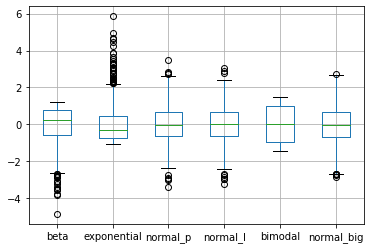

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()